Moyennes (float):
Pour            390.52
Contre          416.06
Sans opinion    193.42
dtype: float64

Moyennes arrondies (int) avec round():
Pour            391
Contre          416
Sans opinion    193
dtype: int64
Moyennes (float1):
 Pour            390.52
Contre          416.06
Sans opinion    193.42
dtype: float64

Somme des moyennes1: 999.9999999999999

Fréquences (float1):
 Pour            0.39052
Contre          0.41606
Sans opinion    0.19342
dtype: float64

Fréquences arrondies (2 décimales):
 Pour            0.39
Contre          0.42
Sans opinion    0.19
dtype: float64

Population - moyennes (float2):
 852    666.5
dtype: float64

Population - fréquences arrondies (2 décimales):
 852    1.0
dtype: float64
Taille d'échantillon utilisée: 1000

Fréquences et intervalles de fluctuation (95 %) :
                  freq  freq_arrondie  IC95_lower  IC95_upper
Pour          0.39052           0.39        0.36        0.42
Contre        0.41606           0.42        0.39        0.45
Sans 

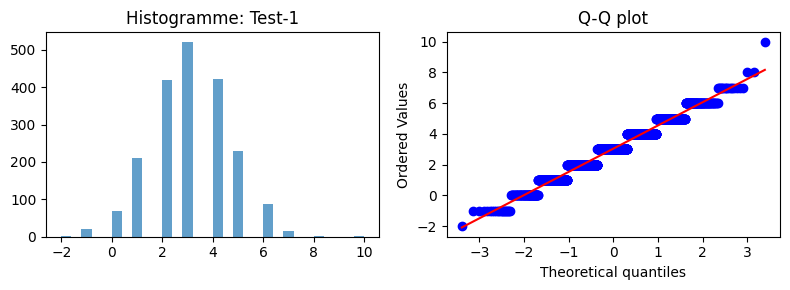

Test-2 — Shapiro-Wilk: stat=0.2609, p=7.0494e-67, n=2000
  -> p ≤ 0.05: on rejette l'hypothèse de normalité.


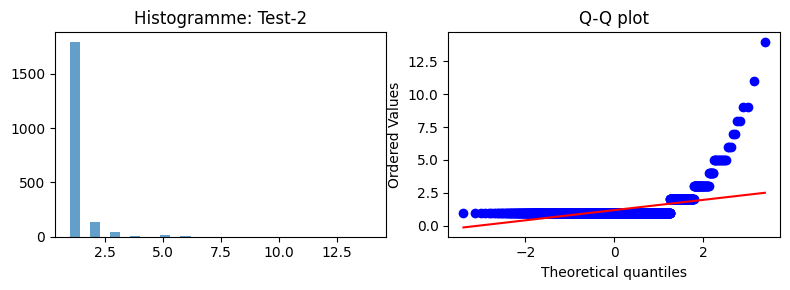

In [ ]:
import pandas as pd
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt

# Question 1 #
def ouvrirUnFichier(nom=None):
    # si nom non fourni, utiliser le fichier du workspace
    if nom is None:
        nom = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\Echantillonnage-100-Echantillons.csv"
    df = pd.read_csv(nom)
    return df

df = ouvrirUnFichier()          # ou ouvrirUnFichier("chemin/vers/fichier.csv")
moyennes = df.mean()            # moyennes flottantes
moyennes_arrondies = moyennes.apply(lambda x: int(round(x)))  # arrondi natif puis entier

print("Moyennes (float):")
print(moyennes)
print("\nMoyennes arrondies (int) avec round():")
print(moyennes_arrondies)

# --- échantillon ---
df = ouvrirUnFichier()
moyennes = df.mean()                # moyennes par colonne
somme_moyennes = moyennes.sum()     # somme des 3 moyennes
frequences = moyennes / somme_moyennes
frequences_arrondies = frequences.apply(lambda x: round(x, 2))  # arrondi à 2 décimales

print("Moyennes (float1):\n", moyennes)
print("\nSomme des moyennes1:", somme_moyennes)
print("\nFréquences (float1):\n", frequences)
print("\nFréquences arrondies (2 décimales):\n", frequences_arrondies)

# --- population réelle (même principe) ---
pop_path = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\Echantillonnage-population-reelle.csv"
try:
    df_pop = pd.read_csv(pop_path)
    moy_pop = df_pop.mean()
    somme_moy_pop = moy_pop.sum()
    freqs_pop = moy_pop / somme_moy_pop
    freqs_pop_arr = freqs_pop.apply(lambda x: round(x, 2))
    print("\nPopulation - moyennes (float2):\n", moy_pop)
    print("\nPopulation - fréquences arrondies (2 décimales):\n", freqs_pop_arr)
except FileNotFoundError:
    print(f"\nFichier population non trouvé: {pop_path}")

 # Calcul de l'intervalle de fluctuation (95 %, z = 1.96) pour chaque fréquence
z = 1.96

# Question 2 #
# déterminer la taille d'un échantillon (somme des 3 colonnes par ligne)
sums = df.sum(axis=1)
if sums.nunique() == 1:
    n = int(sums.iloc[0])
else:
    n = int(round(sums.mean()))
print(f"Taille d'échantillon utilisée: {n}")

# fréquences (moyennes / somme des moyennes)
frequences = moyennes / moyennes.sum() 

# écart-type de la proportion et intervalle 95%
import numpy as np
se = np.sqrt(frequences * (1 - frequences) / n)
lower = (frequences - z * se).clip(lower=0)
upper = (frequences + z * se).clip(upper=1)

resultats = pd.DataFrame({
    "freq": frequences,
    "freq_arrondie": frequences.apply(lambda x: round(x, 2)),
    "IC95_lower": lower.apply(lambda x: round(x, 2)),
    "IC95_upper": upper.apply(lambda x: round(x, 2))
})

print("\nFréquences et intervalles de fluctuation (95 %) :\n", resultats)

# Isolation du premier échantillon (première ligne) et conversion en list()
first_row = df.iloc[0]                     # série pandas correspondant à la 1ère ligne
row_list = list(first_row.astype(int))     # cast en int puis conversion en list() (fonctions natives)

# Somme (taille de l'échantillon) et fréquences
n = sum(row_list)
print(f"Taille de l'échantillon isolé (somme des effectifs) : {n}")

freqs = [x / n for x in row_list]

# Intervalle de confiance 95% (z = 1.96) avec fonctions natives
import math
z = 1.96
se_list = [math.sqrt(p * (1 - p) / n) for p in freqs]
lower = [max(0, p - z * se) for p, se in zip(freqs, se_list)]
upper = [min(1, p + z * se) for p, se in zip(freqs, se_list)]

# Présentation des résultats (DataFrame pour lisibilité)
import pandas as pd
result_iso = pd.DataFrame({
    "count": row_list,
    "freq": [round(p, 3) for p in freqs],
    "IC95_lower": [round(x, 3) for x in lower],
    "IC95_upper": [round(x, 3) for x in upper]
}, index=df.columns)

print("\nRésultats pour le 1er échantillon :\n", result_iso)

# Comparaison rapide avec les fréquences calculées précédemment sur l'ensemble des échantillons
try:
    # 'frequences' existant dans le notebook : fréquences moyennes sur tous les échantillons
    comp = result_iso.copy()
    comp["freq_moyenne_echantillons"] = [round(x, 3) for x in list(frequences)]
    print("\nComparaison avec les fréquences moyennes sur tous les échantillons :\n", comp)
except NameError:
    print("\nLa variable 'frequences' (résultat global) n'existe pas dans le contexte actuel.")

# Question 3 Théorie de la décision # 


def test_shapiro(path, label):
    df = pd.read_csv(path)                     # reads header by default
    data = df.iloc[:,0].dropna().values        # colonne 0 ou adapter
    stat, p = stats.shapiro(data)
    print(f"{label} — Shapiro-Wilk: stat={stat:.4f}, p={p:.4e}, n={len(data)}")
    # interprétation simple
    alpha = 0.05
    if p > alpha:
        print(f"  -> p > {alpha}: on ne rejette pas l'hypothèse de normalité.")
    else:
        print(f"  -> p ≤ {alpha}: on rejette l'hypothèse de normalité.")
    # graphiques pour vérification visuelle
    fig, axs = plt.subplots(1,2, figsize=(8,3))
    axs[0].hist(data, bins=30, color='C0', alpha=0.7)
    axs[0].set_title(f"Histogramme: {label}")
    stats.probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title("Q-Q plot")
    plt.tight_layout()
    plt.show()

# --- population réelle (même principe) ---
pop_path = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\Echantillonnage-population-reelle.csv"
try: 
    df_pop = pd.read_csv(pop_path, header=None)
    moy_pop = df_pop.iloc[:, 0].mean()
except FileNotFoundError:
    print(f"\nFichier population réelle non trouvé: {pop_path}")
# chemins vers les fichiers (adapter si nécessaire)
path1 = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\Loi-normale-Test-1.csv"
path2 = r"e:\EXOS ANALYSE DONNEES S1\SEANCE 5\Loi-normale-Test-2.csv"

test_shapiro(path1, "Test-1")
test_shapiro(path2, "Test-2")
